# Multiple Linear Regression 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data Set

In [ ]:
data=pd.read_excel("/content/sample_data/Covid_Data_new (2).xlsx")
print(data)
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values


     age body_temperature  Blood O2 Level in Percentage Needed Hospitalization
0   10.0           Normal                          97.0                     No
1   12.0           Normal                          97.0                     No
2   15.0           Normal                          94.0                     No
3   10.0           Normal                          97.0                     No
4   13.0         Moderate                          94.0                     No
..   ...              ...                           ...                    ...
65  86.0             High                          76.0                    Yes
66  61.0         Moderate                          90.0                     No
67  94.0             High                          64.0                    Yes
68  81.0             High                          75.0                    Yes
69  76.0             High                          80.0                    Yes

[70 rows x 4 columns]


In [ ]:
data.head()

,age,body_temperature,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,97.0,No
1,12.0,Normal,97.0,No
2,15.0,Normal,94.0,No
3,10.0,Normal,97.0,No
4,13.0,Moderate,94.0,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           69 non-null     float64
 1   body_temperature              70 non-null     object 
 2   Blood O2 Level in Percentage  69 non-null     float64
 3   Needed Hospitalization        70 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.3+ KB


In [ ]:
data.describe()

,age,Blood O2 Level in Percentage
count,69.000000,69.000000
mean,45.130435,82.072464
std,24.223781,11.702587
min,10.000000,53.000000
25%,25.000000,72.000000
50%,42.000000,86.000000
75%,62.000000,92.000000
max,94.000000,99.000000


In [ ]:
print(x)


[[10.0 'Normal' 97.0]
 [12.0 'Normal' 97.0]
 [15.0 'Normal' 94.0]
 [10.0 'Normal' 97.0]
 [13.0 'Moderate' 94.0]
 [12.0 'Moderate' 97.0]
 [13.0 'Moderate' 93.0]
 [15.0 'Moderate' 92.0]
 [18.0 'Moderate' 66.0]
 [19.0 'Normal' 92.0]
 [20.0 'Normal' 93.0]
 [17.0 'Normal' 93.0]
 [16.0 'Normal' 92.0]
 [18.0 'Normal' 93.0]
 [20.0 'Normal' 92.0]
 [25.0 'Moderate' 93.0]
 [24.0 'Moderate' 92.0]
 [26.0 'High' 94.0]
 [28.0 'Normal' 99.0]
 [29.0 'Normal' 93.0]
 [30.0 'Moderate' 62.0]
 [19.0 'Normal' 89.0]
 [25.0 'Normal' 86.0]
 [26.0 'Normal' nan]
 [28.0 'Normal' 89.0]
 [30.0 'Moderate' 86.0]
 [35.0 'Moderate' 89.0]
 [32.0 'Moderate' 84.0]
 [nan 'Moderate' 90.0]
 [32.0 'Moderate' 89.0]
 [35.0 'Moderate' 92.0]
 [38.0 'High' 75.0]
 [40.0 'Moderate' 90.0]
 [46.0 'High' 91.0]
 [48.0 'Moderate' 93.0]
 [42.0 'High' 92.0]
 [40.0 'High' 92.0]
 [49.0 'Moderate' 80.0]
 [50.0 'High' 77.0]
 [36.0 'High' 90.0]
 [52.0 'High' 80.0]
 [56.0 'High' 77.0]
 [58.0 'High' 70.0]
 [59.0 'High' 69.0]
 [60.0 'High' 68.0]
 [

In [ ]:

print(y)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes']


# **Missing data Handling**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(x[:, 0:1])
x[: , 0:1] = imputer.transform(x[:, 0:1])
imputer.fit(x[:, 2:3])
x[: , 2:3] = imputer.transform(x[:, 2:3])

print(x)

[[10.0 'Normal' 97.0]
 [12.0 'Normal' 97.0]
 [15.0 'Normal' 94.0]
 [10.0 'Normal' 97.0]
 [13.0 'Moderate' 94.0]
 [12.0 'Moderate' 97.0]
 [13.0 'Moderate' 93.0]
 [15.0 'Moderate' 92.0]
 [18.0 'Moderate' 66.0]
 [19.0 'Normal' 92.0]
 [20.0 'Normal' 93.0]
 [17.0 'Normal' 93.0]
 [16.0 'Normal' 92.0]
 [18.0 'Normal' 93.0]
 [20.0 'Normal' 92.0]
 [25.0 'Moderate' 93.0]
 [24.0 'Moderate' 92.0]
 [26.0 'High' 94.0]
 [28.0 'Normal' 99.0]
 [29.0 'Normal' 93.0]
 [30.0 'Moderate' 62.0]
 [19.0 'Normal' 89.0]
 [25.0 'Normal' 86.0]
 [26.0 'Normal' 82.07246376811594]
 [28.0 'Normal' 89.0]
 [30.0 'Moderate' 86.0]
 [35.0 'Moderate' 89.0]
 [32.0 'Moderate' 84.0]
 [45.130434782608695 'Moderate' 90.0]
 [32.0 'Moderate' 89.0]
 [35.0 'Moderate' 92.0]
 [38.0 'High' 75.0]
 [40.0 'Moderate' 90.0]
 [46.0 'High' 91.0]
 [48.0 'Moderate' 93.0]
 [42.0 'High' 92.0]
 [40.0 'High' 92.0]
 [49.0 'Moderate' 80.0]
 [50.0 'High' 77.0]
 [36.0 'High' 90.0]
 [52.0 'High' 80.0]
 [56.0 'High' 77.0]
 [58.0 'High' 70.0]
 [59.0 'High'

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[0.0 0.0 1.0 10.0 97.0]
 [0.0 0.0 1.0 12.0 97.0]
 [0.0 0.0 1.0 15.0 94.0]
 [0.0 0.0 1.0 10.0 97.0]
 [0.0 1.0 0.0 13.0 94.0]
 [0.0 1.0 0.0 12.0 97.0]
 [0.0 1.0 0.0 13.0 93.0]
 [0.0 1.0 0.0 15.0 92.0]
 [0.0 1.0 0.0 18.0 66.0]
 [0.0 0.0 1.0 19.0 92.0]
 [0.0 0.0 1.0 20.0 93.0]
 [0.0 0.0 1.0 17.0 93.0]
 [0.0 0.0 1.0 16.0 92.0]
 [0.0 0.0 1.0 18.0 93.0]
 [0.0 0.0 1.0 20.0 92.0]
 [0.0 1.0 0.0 25.0 93.0]
 [0.0 1.0 0.0 24.0 92.0]
 [1.0 0.0 0.0 26.0 94.0]
 [0.0 0.0 1.0 28.0 99.0]
 [0.0 0.0 1.0 29.0 93.0]
 [0.0 1.0 0.0 30.0 62.0]
 [0.0 0.0 1.0 19.0 89.0]
 [0.0 0.0 1.0 25.0 86.0]
 [0.0 0.0 1.0 26.0 82.07246376811594]
 [0.0 0.0 1.0 28.0 89.0]
 [0.0 1.0 0.0 30.0 86.0]
 [0.0 1.0 0.0 35.0 89.0]
 [0.0 1.0 0.0 32.0 84.0]
 [0.0 1.0 0.0 45.130434782608695 90.0]
 [0.0 1.0 0.0 32.0 89.0]
 [0.0 1.0 0.0 35.0 92.0]
 [1.0 0.0 0.0 38.0 75.0]
 [0.0 1.0 0.0 40.0 90.0]
 [1.0 0.0 0.0 46.0 91.0]
 [0.0 1.0 0.0 48.0 93.0]
 [1.0 0.0 0.0 42.0 92.0]
 [1.0 0.0 0.0 40.0 92.0]
 [0.0 1.0 0.0 49.0 80.0]
 [1.0 0.0 0.0 50.0 77.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]


## Splitting into test and training set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.4 ,random_state = 23)


## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression()
regg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [ ]:
y_pred= regg.predict(x_test)
np.set_printoptions(precision =3)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_pred),1)),1))

[[ 0.022  0.   ]
 [ 0.948  1.   ]
 [ 0.156  0.   ]
 [ 1.504  1.   ]
 [ 0.345  0.   ]
 [ 0.932  1.   ]
 [ 0.791  1.   ]
 [-0.103  0.   ]
 [-0.19   0.   ]
 [ 0.205  0.   ]
 [ 0.989  1.   ]
 [-0.146  0.   ]
 [ 0.655  1.   ]
 [ 0.236  0.   ]
 [-0.037  0.   ]
 [ 0.237  0.   ]
 [ 0.811  1.   ]
 [ 0.127  0.   ]
 [ 0.822  1.   ]
 [-0.027  0.   ]
 [ 0.721  1.   ]
 [-0.032  0.   ]
 [ 0.077  0.   ]
 [ 0.381  1.   ]
 [ 0.985  1.   ]
 [ 0.06   0.   ]
 [ 1.182  1.   ]
 [ 0.765  1.   ]
 [ 0.819  1.   ]
 [ 0.023  0.   ]
 [-0.015  0.   ]
 [ 1.083  1.   ]
 [ 0.884  1.   ]
 [-0.011  0.   ]
 [ 0.054  0.   ]]


## Visualizing results

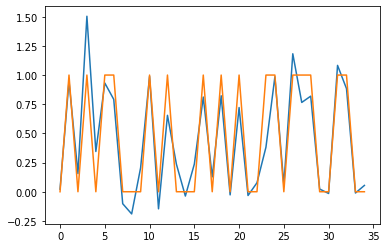

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()